# Homework 2 - Solution
## Markets
### FINM September Launch

Mark Hendricks

hendricks@uchicago.edu

Maneet Singh - TA

maneetsingh@uchicago.edu

## Data
- This homework uses the file, “inflation_data.xlsx”.
- Find the data in the Github repo associated with the module, (link on Canvas.)


The data file contains...

- Macroeconomic Data
    
    - Core CPI price index, denoted as p.
    
    - M2 Money Supply, denoted as m.

- Financial data

- Returns on the S&P 500, (via the SPY ETF)


See the “build data” folder for the details on how the data was constructed.

In [1]:
import pandas as pd
import datetime

import numpy as np
import warnings

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               StrMethodFormatter,
                               AutoMinorLocator)

In [2]:
data = pd.read_excel('../data/inflation_data.xlsx',sheet_name='macro')
prices = data['CPI']
money = data['M2']

FREQ = 12

## 1. Assessing the OLS Model

This problem considers the predictability of inflation over various horizons. To do so, note the following:

- $i_{t,t+h}$: Inflation is the h-period growth rate of CPI:

$$
i_{t,t+h} ≡ \frac{p_{t+h}}{p_t} − 1
$$


- $g_{t,t+h}$: Money growth considered below is the growth rate of M2 Money supply:

$$
g_{t,t+h} ≡ \frac{m_{t+h}}{m_t}− 1
$$

1. Estimate an OLS regression to see if CPI and Money are contemporaneously correlated:

$$
p_t = \alpha + \beta m_t + \epsilon_t
$$

    - Note that this is not a lagged regression, but rather a regular time-series regression.
    - Answer the questions below for a one-year horizon: h = 12.
    
    (a) Report the estimated R-squared.
    (b) Report the point-estimate of β.

In [3]:
X = money
y = prices

results = sm.OLS(y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3618.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          8.42e-291
Time:                        15:13:57   Log-Likelihood:                -3721.7
No. Observations:                 760   AIC:                             7447.
Df Residuals:                     758   BIC:                             7457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.7397      1.645     38.145      0.000      59.511      65.969
M2             0.0145      0.000     60.151      0.000       0.014       0.015
==============================================================================
Omnibus:                       42.247   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.033
Skew:                          -0.458   Prob(JB):                     1.50e-08
Kurtosis:                       2.454   Cond. No.                     9.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. This time, examine a regression of growth rates. Specifically, estimate an OLS regression to see if inflation and money growth are contemporaneously correlated:

$$
i_{t,t+h} = \alpha + \beta g_{t,t+h} + \epsilon_{t,t+h}
$$

    • Note that this is not a lagged regression, but rather a regular time-series regression.
    • Answer the questions below for a one-year horizon: h = 12.

    (a) Report the estimated R-squared.
    (b) Report the point-estimate of β.

In [4]:
HORZ = FREQ

inflation = (prices / prices.shift(HORZ) -1).dropna()
money_growth = (money/money.shift(HORZ) - 1).dropna()
#money_growth = data.loc[money_growth.index,'Fed']

inflation.name = 'inflation'
money_growth.name = 'money growth'

X = money_growth
y = inflation

results = sm.OLS(y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflation   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.370
Date:                Thu, 15 Sep 2022   Prob (F-statistic):             0.0118
Time:                        15:13:57   Log-Likelihood:                 1610.0
No. Observations:                 748   AIC:                            -3216.
Df Residuals:                     746   BIC:                            -3207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0320      0.002     13.839      0.000       0.027       0.037
money growth     0.0729      0.029      2.524      0.012       0.016       0.130
==============================================================================
Omnibus:                      211.421   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.782
Skew:                           1.517   Prob(JB):                    5.38e-106
Kurtosis:                       5.519   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. The result of regressing inflation on money growth is very different from regressing CPI on Money. What do you conclude? Does it seem that variation in money contemporaneously explains variation in inflation? 

    In particular, what is wrong with one of the two regression models? Consider plotting the raw dependent and independent variable of each.

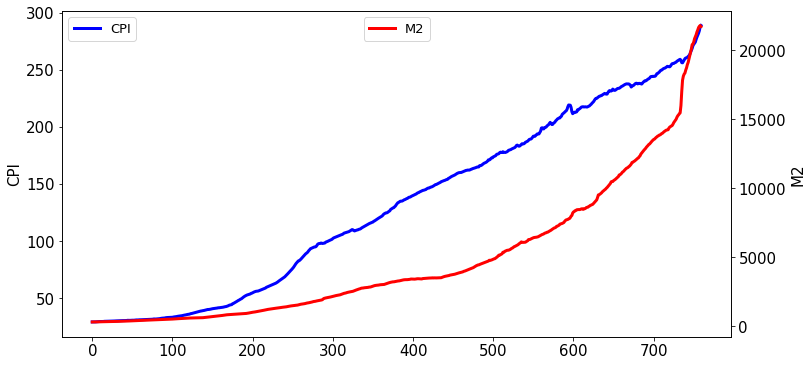

In [5]:
ax = data[['CPI']].plot(color='b',linewidth=3,ylabel='CPI',legend=['CPI'])
ax2 = plt.twinx(ax)
data[['M2']].plot(ax=ax2,color='r',linewidth=3,ylabel='M2',legend=['M2'])
plt.legend(loc='upper center')
plt.show()

Clearly, when regressing CPI on M2 we detect a spurious correlation since both of these variable are non-stationary. This results in a high r-squared value which exists only because both of these series grow with time, not because of their correlation to each other.

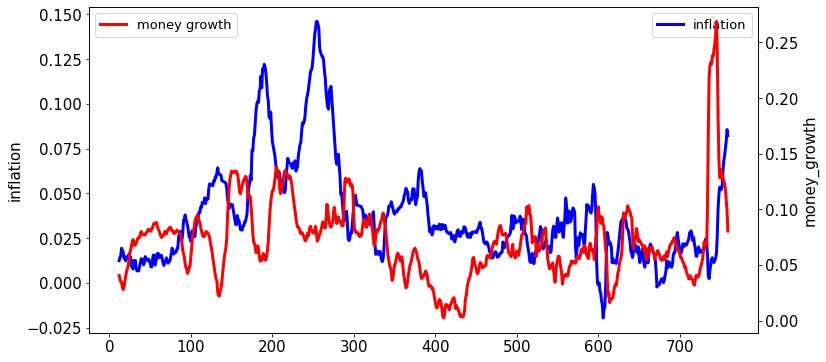

In [6]:
ax = inflation.plot(color='b',linewidth=3,ylabel='inflation',legend=['inflation'])
ax2 = plt.twinx(ax)
money_growth.plot(ax=ax2,color='r',linewidth=3,ylabel='money_growth',legend=['money_growth'])
plt.legend(loc='upper left')
plt.show()

The regression with money growth and inflation is more robust, since both of the variables are stationary. The low r-squared and low correlation suggest that variation in money alone is not sufficient in explaining the variation in inflation.

4. Answer the remaining questions regarding the estimation of inflation on money growth in part 2 above.

    Do the residuals seem to be iid? That is,
    
    (a) do they seem to be drawn from a constant variance?
    
    (b) do they have serial correlation?
    
    Assess this informally by plotting the time-series of estimated sample residuals, e.

<AxesSubplot:>

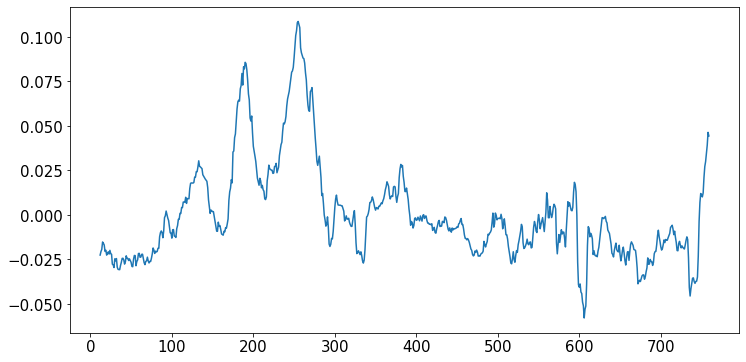

In [7]:
e = results.resid

if len(e.shape)==1:
    e = pd.Series(e)

e.plot()

In [8]:
pd.concat([e,e.shift()],axis=1).corr()

,0,1
0,1.000000,0.990005
1,0.990005,1.000000


Errors have positive serial correlation and don't have constant variance as well. Due to this, errors are not i.i.d.

5. Suppose that the residuals are heteroskedastic and have serial correlation.
    
    (a) Report whether the estimates for α or β are statistically significant relative to 0, for a
    significance level of 5%.$^1$
    
    (b) Do you have concerns about the accuracy of the reported p-values?
    
    (c) Do you have concerns about the estimated beta? For small samples, for large samples?

- Estimates for α or β are statistically significant relative to 0, for a significance level of 5% since the p-value for both is below 5%

- We should be concerned about the accuracy of these p-values since the residuals do not have constant variance. Non-constant variance would result in an unreliable t-statistic

- Estimated betas are still unbiased, however they are not efficient any more. For small samples, this would mean that betas can be quite different between different samples.

6. OPTIONAL

    (a) Assess the residuals with the Durbin-Watson test for serial correlation. $^2$
    
    (b) Formally assess heteroskedasticity of the residuals with White’s test. $^3$

In [9]:
from statsmodels.stats.stattools import durbin_watson
#perform Durbin-Watson test
dw_stats = durbin_watson(e)
print('Durbin Watson Test Statistic: {:,.2f}'.format(dw_stats))

from statsmodels.stats.diagnostic import het_white
X = results.model.exog
lm, pval, _, _ = het_white(e,X)
print(f'White-test for Heteroskedasticity p-value is {pval:.4%}')

Durbin Watson Test Statistic: 0.02
White-test for Heteroskedasticity p-value is 0.0098%


## 2. Forecasting via Regressions

Consider a forecasting (lagged) regression for inflation at horizon h:

$$
            i_{t,t+h} = \alpha + \beta x_{t−h,t} + \epsilon_{t,t+h}
$$

- Note that the regressor is lagged relative to the dependent variable.

1. Forecast using lagged inflation. Namely, estimate the above for
    
    • h = 1, 12, 24, 36
    
    • inflation as the regressor
    
    For each horizon regression, report the R-squared.

In [10]:
def set_autoregressor(df,LAG):
    
    X = df.shift(LAG).dropna()
    y = df

    X,y = X.align(y,join='inner')
    X = X.values.reshape(-1,1)
    y = y.values.reshape(-1,1)

    return X,y

In [11]:
LAG = FREQ

X,y = set_autoregressor(prices,LAG)
mod = LinearRegression().fit(X,y)
mod.score(X,y)

results = sm.OLS(y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.960e+05
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:13:58   Log-Likelihood:                -1814.0
No. Observations:                 748   AIC:                             3632.
Df Residuals:                     746   BIC:                             3641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1157      0.197     10.714      0.000       1.728       2.503
x1             1.0145      0.001    771.992      0.000       1.012       1.017
==============================================================================
Omnibus:                      264.441   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1607.849
Skew:                           1.460   Prob(JB):                         0.00
Kurtosis:                       9.562   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression result is amazing R-squared.

But is this regression valid?

2. Redo the previous problem, but this time with (lagged) money growth as the regressor instead of (lagged) inflation.

3. Redo the previous problem, this time using both (lagged) inflation and (lagged) money growth as the regressors.

## Stationary Transformation: Growth Rates

* Price Index to Inflation 
* Money to Money Growth

In [12]:
horizons = FREQ * np.array([1,2,3])
if 1 not in horizons:
    horizons = np.insert(horizons,0,1)

r2 = pd.DataFrame(index=pd.Index(horizons,name='horizon (months)'),columns=['inflation','money growth','both'],dtype=float)
betas_uni = r2[['inflation','money growth']].copy()
betas_multi = betas_uni.copy()

for LAG in horizons:

    inflation = (prices / prices.shift(LAG) -1).dropna()
    money_growth = (money/money.shift(LAG) - 1).dropna()
#    money_growth = data.loc[money_growth.index,'Fed']
    inflation.name = 'inflation'
    money_growth.name = 'money growth'
    
    Xi,y = set_autoregressor(inflation,LAG)
    mod = LinearRegression().fit(Xi,y)    
    lab = r2.columns[0]
    r2.loc[LAG,lab] = mod.score(Xi,y)
    betas_uni.loc[LAG,lab] = mod.coef_
    
    Xm,y = set_autoregressor(money_growth,LAG)
    mod = LinearRegression().fit(Xm,y)
    lab = r2.columns[1]
    r2.loc[LAG,lab] = mod.score(Xm,y)
    betas_uni.loc[LAG,lab] = mod.coef_
        
    X = pd.DataFrame(index=inflation.index[LAG:],data=np.concatenate((Xi,Xm),axis=1),columns=['inflation','money growth'])
    y,X = inflation.align(X,join='inner')
    mod = LinearRegression().fit(X,y)
    lab = r2.columns[2]
    r2.loc[LAG,lab] = mod.score(X,y)
    betas_multi.loc[LAG,:] = mod.coef_

In [13]:
display(pd.concat([betas_uni,betas_multi],axis=1,keys=['univariate','multivariate']).style.set_caption('betas').format('{:.1%}'))
display(r2.style.set_caption('r-squared').format('{:.1%}'))

,inflation,money growth,both
horizon (months),,,
1,39.9%,40.2%,40.1%
12,55.5%,17.6%,61.4%
24,40.5%,7.0%,52.3%
36,36.6%,17.7%,54.0%


4. Does either regressor seem to have forecasting power? Does combining them improve the forecast?

Lagged Inflation has some forecasting power but not by a lot. Combining inflation and money growth does improve the performance marginally.

5. Validity of the results

    (a) Plot the estimated residual for the forecasting regression at horizon h = 12 which uses both
    inflation and money growth as regressors.
    
    (b) Does it seem to have serial correlation?
    
    (c) Supposing the residual has serial correlation, does this give you concern for the betas above,
    or just the p-values?

In [14]:
results = sm.OLS(y,sm.add_constant(X)).fit()

e = results.resid

if len(e.shape)==1:
    e = pd.Series(e)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflation   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     402.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          2.92e-116
Time:                        15:13:58   Log-Likelihood:                 997.05
No. Observations:                 688   AIC:                            -1988.
Df Residuals:                     685   BIC:                            -1975.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0389      0.007     -5.791      0.000      -0.052      -0.026
inflation        0.4079      0.028     14.555      0.000       0.353       0.463
money growth     0.5043      0.031     16.123      0.000       0.443       0.566
==============================================================================
Omnibus:                       11.287   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.418
Skew:                           0.214   Prob(JB):                      0.00122
Kurtosis:                       3.534   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

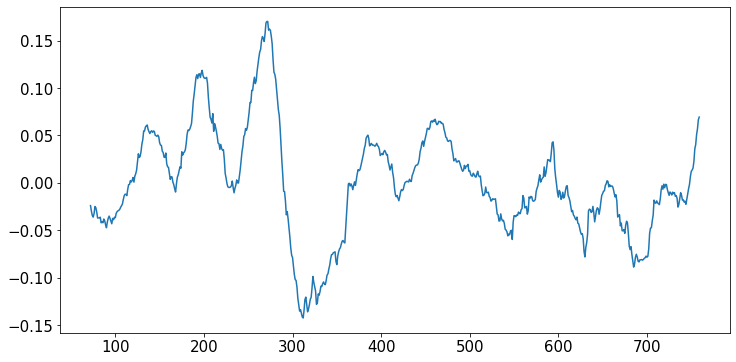

In [15]:
e.plot()
plt.show()

In [16]:
from statsmodels.stats.stattools import durbin_watson
#perform Durbin-Watson test
dw_stats = durbin_watson(e)
print('Durbin Watson Test Statistic: {:,.2f}'.format(dw_stats))

Durbin Watson Test Statistic: 0.01


Clearly, the model has positive serial correlation.

If the model has serial correlation, we are only concerned about the accuracy of the p-values. This is because the estimates are still unbiased and consistent, but the minimum variance property (which assume residuals to be i.i.d.) is not satisfied. 